In [1]:
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import seaborn
import os

# Local config
import config_dataset3 as config

In [4]:
# Choose features for box plot:
OPTIONAL_FEATURE_NAMES = [config.PRODUCT_W]


In [5]:
# Get features which is the optional features we picked merged with must keep features.
# Get the title purpose
FEATURES, FEATURE_TITLE =  config.get_features_and_title(OPTIONAL_FEATURE_NAMES)

# Get all paths inside results dir:
RESULT_FEATURE_DIR_PATH, MODEL_DIR_PATH, SCORES_DIR_PATH, PLOTS_DIR_PATH, SUMMARY_FILE_PATH = config.get_paths(FEATURE_TITLE)

print(FEATURES)
print(FEATURE_TITLE)

['CHWTON/SQM', 'KW/SQM', 'HTmmBTU/SQM', 'AirT_Mean', 'AbsH_Mean', 'Shade_Top', 'Shade_North', 'Shade_East', 'Shade_South', 'Shade_West', 'ProductW_Top', 'ProductW_North', 'ProductW_East', 'ProductW_South', 'ProductW_West', 'ProductW_Top', 'ProductW_North', 'ProductW_East', 'ProductW_South', 'ProductW_West']
ProductW


/var/folders/2q/t3fsvj_55599x9w4b0lkqym00000gn/T/ipykernel_85722/2593096840.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([label.get_text().replace('_perc_diff', '') for label in ax.get_xticklabels()], fontsize=18)


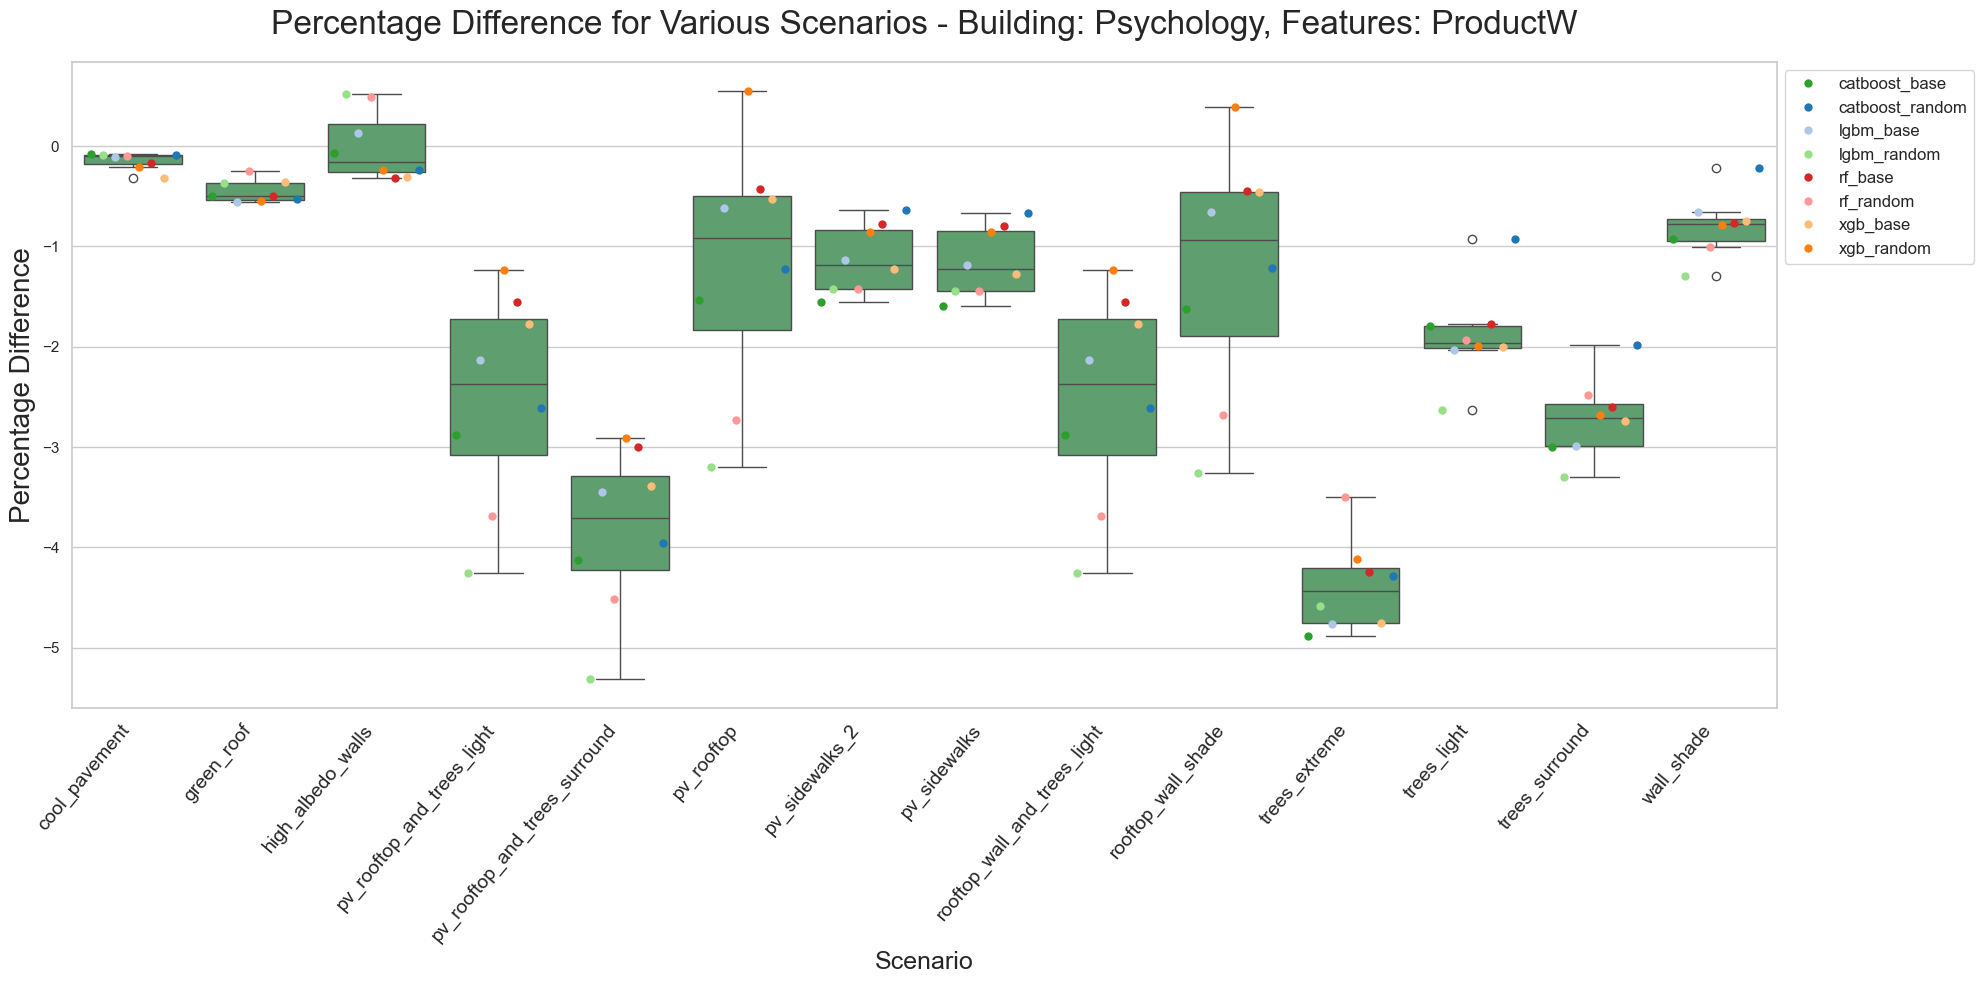

/var/folders/2q/t3fsvj_55599x9w4b0lkqym00000gn/T/ipykernel_85722/2593096840.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([label.get_text().replace('_perc_diff', '') for label in ax.get_xticklabels()], fontsize=18)


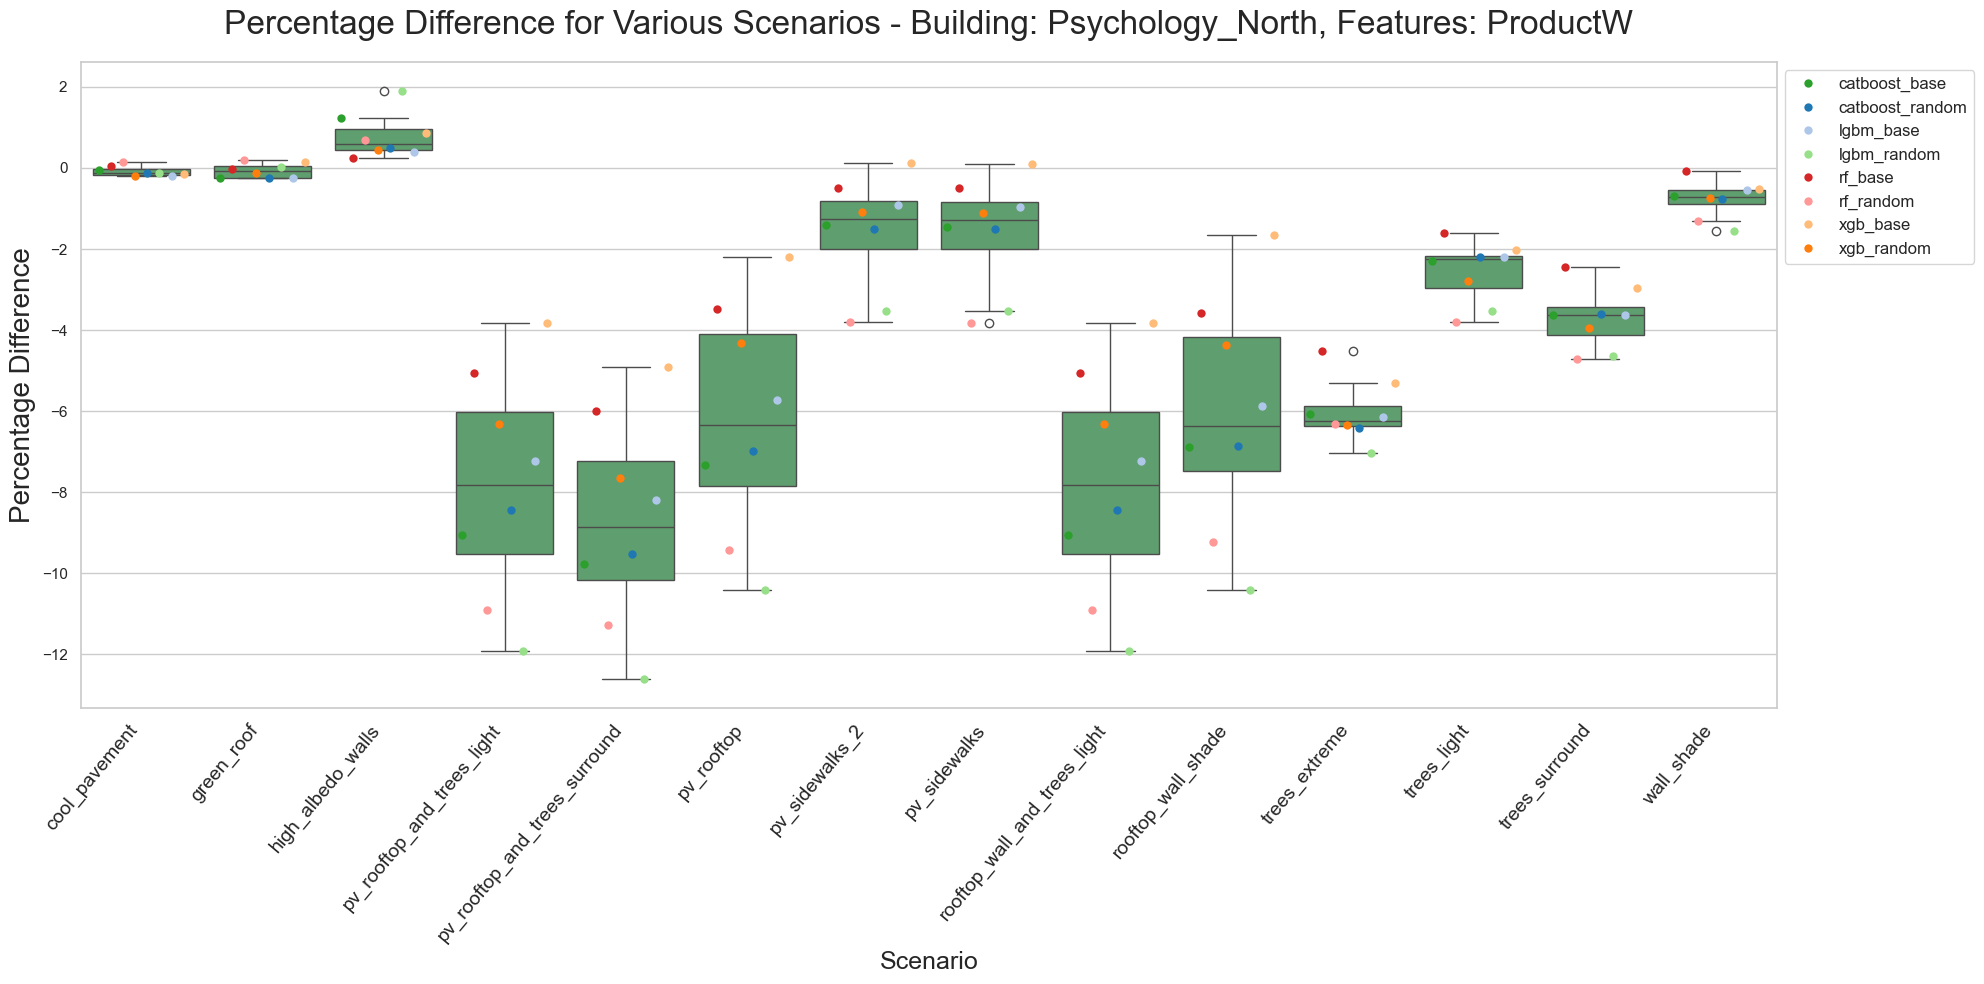

/var/folders/2q/t3fsvj_55599x9w4b0lkqym00000gn/T/ipykernel_85722/2593096840.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([label.get_text().replace('_perc_diff', '') for label in ax.get_xticklabels()], fontsize=18)


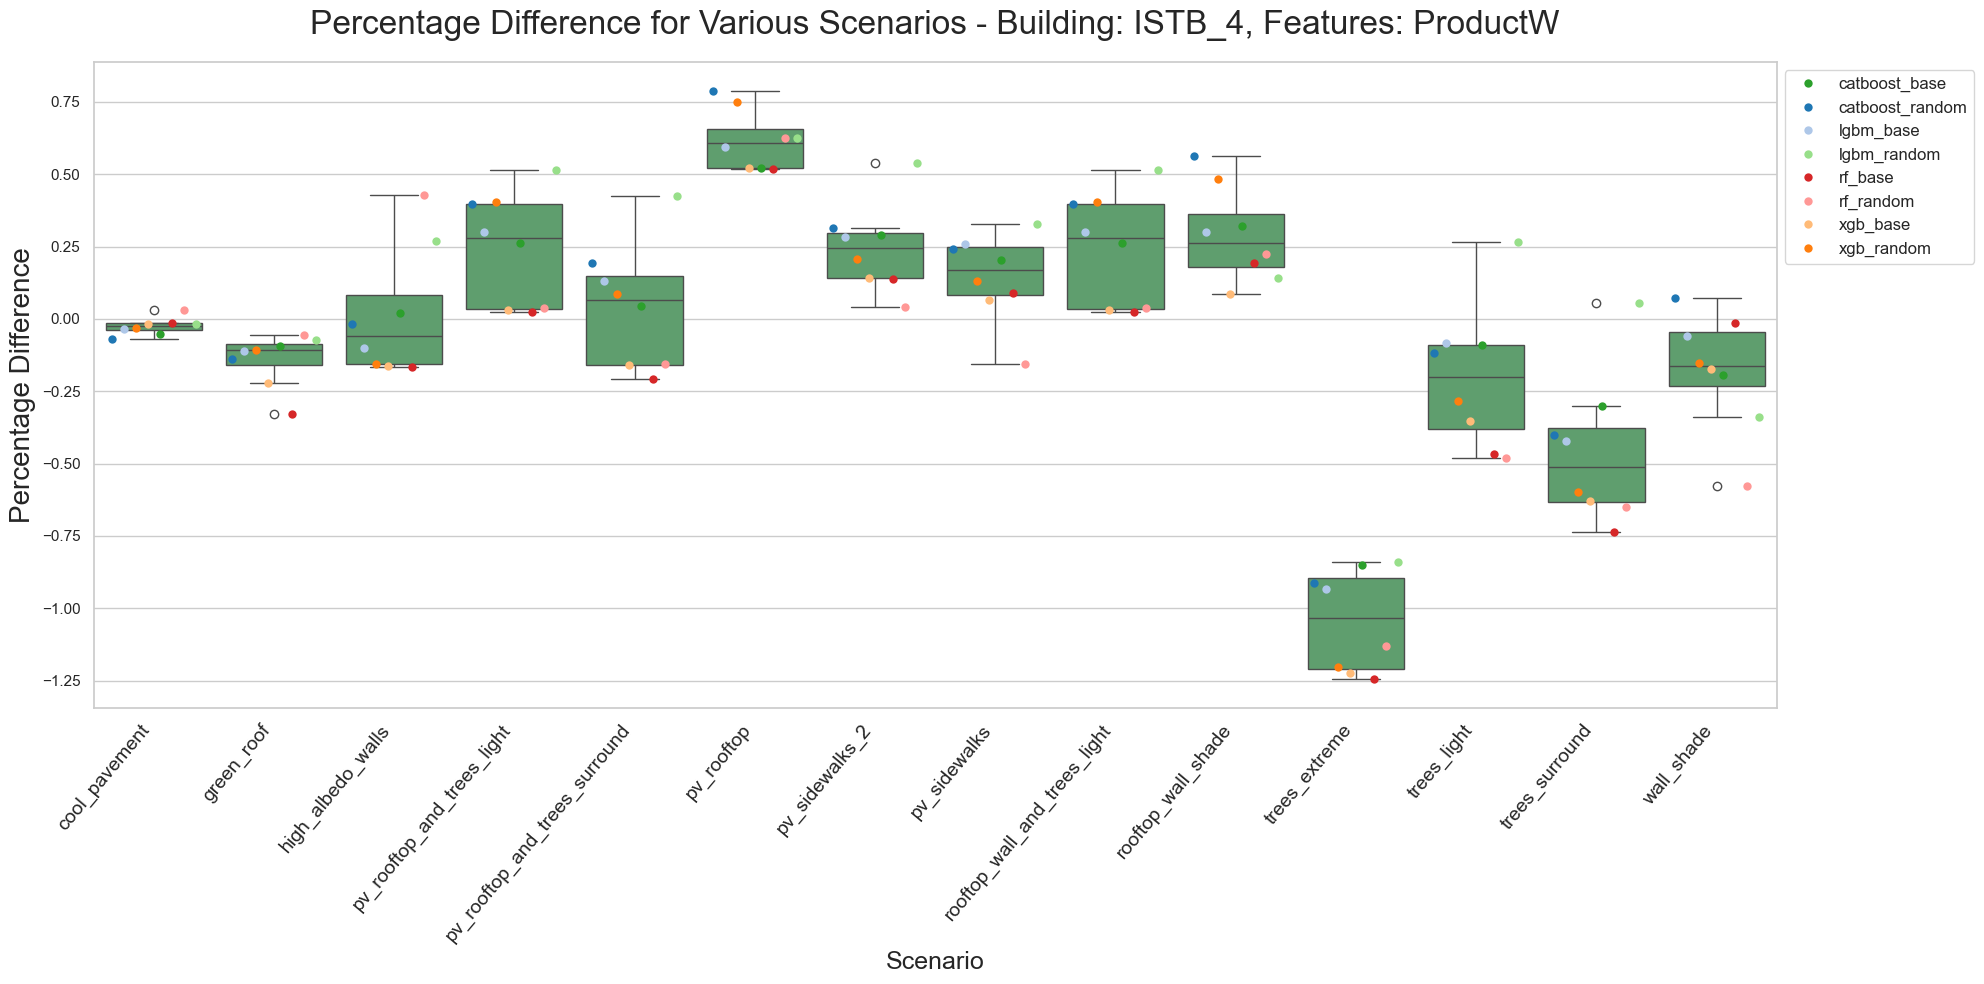

In [6]:
# 1. Load summary CSV file
summary_df = pd.read_csv(SUMMARY_FILE_PATH)

# 2 .Set color palette:
# - Define the 'tab20' palette with 15 colors
tab20_palette = sns.color_palette("tab20", 15)

# - List of all unique models in the FEATURES
unique_models = summary_df['model'].unique()

# - Create a dictionary mapping each model to a color from the 'tab20' palette
model_color_mapping = {model: color for model, color in zip(unique_models, tab20_palette)}

# 3. Get the perc diff variable names. 
# e.g. pv_sidewalks --> pv_sidewalk_perc_diff
scenarios_perc_diff_names=[]
for scenario in config.SCENARIOS:
    scenario += "_perc_diff"
    scenarios_perc_diff_names.append(scenario)

# 4. Melting the DataFrame
melted_df = summary_df.melt(id_vars=['model', 'bldg'], 
                            value_vars=scenarios_perc_diff_names, 
                            var_name='Scenario', 
                            value_name='Percentage Difference')

# 5. Sort by Scenario
melted_df.sort_values(by='Scenario', inplace=True) 


# 6. Plot
for bldg_name in config.BLDG_NAMES:
    # Filter for each bldg_name
    bldg_melted_df = melted_df[melted_df['bldg'] == bldg_name]
    
    # Plotting
    plt.figure(figsize=(20, 10))
    sns.set(style='whitegrid') 
    
    # Overlay the actual data points with colors representing the model
    ax = sns.swarmplot(x='Scenario', y='Percentage Difference', data=bldg_melted_df, hue='model', dodge=True, palette=model_color_mapping, size=6)
    
    # Draw the boxplot.
    sns.boxplot(x='Scenario', y='Percentage Difference', data=bldg_melted_df)
    
    # Customization
    ax.set_xticklabels([label.get_text().replace('_perc_diff', '') for label in ax.get_xticklabels()], fontsize=18)
    ax.set_xlabel(ax.get_xlabel(), fontsize=18)
    ax.set_ylabel(ax.get_ylabel(), fontsize=20)
    plt.xticks(rotation=50, 
               ha='right', 
               fontsize=14)
    plt.title(f'Percentage Difference for Various Scenarios - Building: {bldg_name}, Features: {FEATURE_TITLE}', 
              fontsize=24,
              pad=20
             )
    
    # Sort the legend labels
    handles, labels = ax.get_legend_handles_labels()
    sorted_handles, sorted_labels = zip(*sorted(zip(handles, labels), key=lambda t: t[1]))
    ax.legend(sorted_handles, sorted_labels, bbox_to_anchor=(1, 1), loc=2, fontsize=12)
    plt.tight_layout()
    
    # - Specify the file path for saving the plot
    filename = f"{bldg_name}.png"
    box_plot_dir = PLOTS_DIR_PATH + "/box_plot/"
    if not os.path.exists(box_plot_dir):
        os.makedirs(box_plot_dir)
    file_path = os.path.join(box_plot_dir, filename)

    # - Save the plot
    plt.savefig(file_path)
    plt.show()
    

# Compare Models by Features

In [7]:
# Pick 2nd Features group to compare with.
OPTIONAL_FEATURE_NAMES2 = [config.SHORT_W]
FEATURES2, FEATURE_TITLE2 =  config.get_features_and_title(OPTIONAL_FEATURE_NAMES2)

print(FEATURES2)
print(FEATURE_TITLE2)

# Pick the metric:
METRIC = "r2"

['CHWTON/SQM', 'KW/SQM', 'HTmmBTU/SQM', 'AirT_Mean', 'AbsH_Mean', 'Shade_Top', 'Shade_North', 'Shade_East', 'Shade_South', 'Shade_West', 'ProductW_Top', 'ProductW_North', 'ProductW_East', 'ProductW_South', 'ProductW_West', 'ProductW_Top', 'ProductW_North', 'ProductW_East', 'ProductW_South', 'ProductW_West', 'ShortW_Top', 'ShortW_North', 'ShortW_East', 'ShortW_South', 'ShortW_West']
ShortW


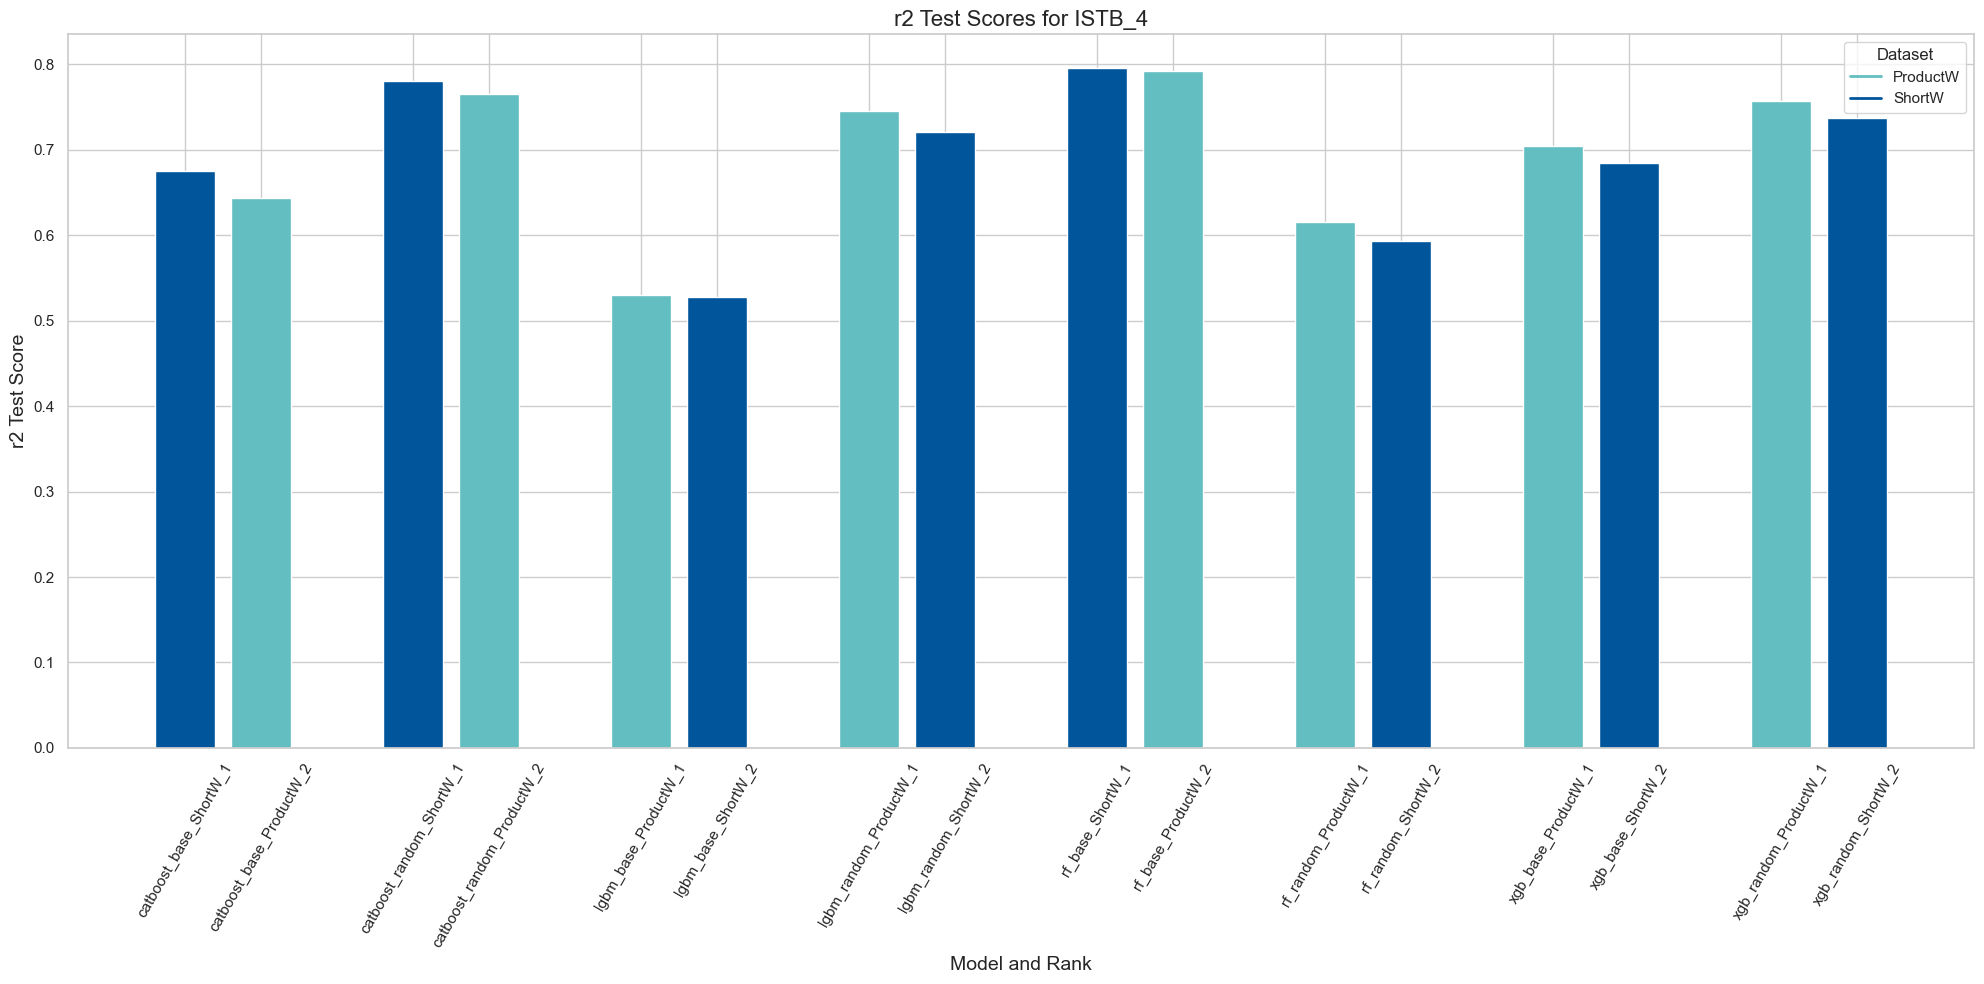

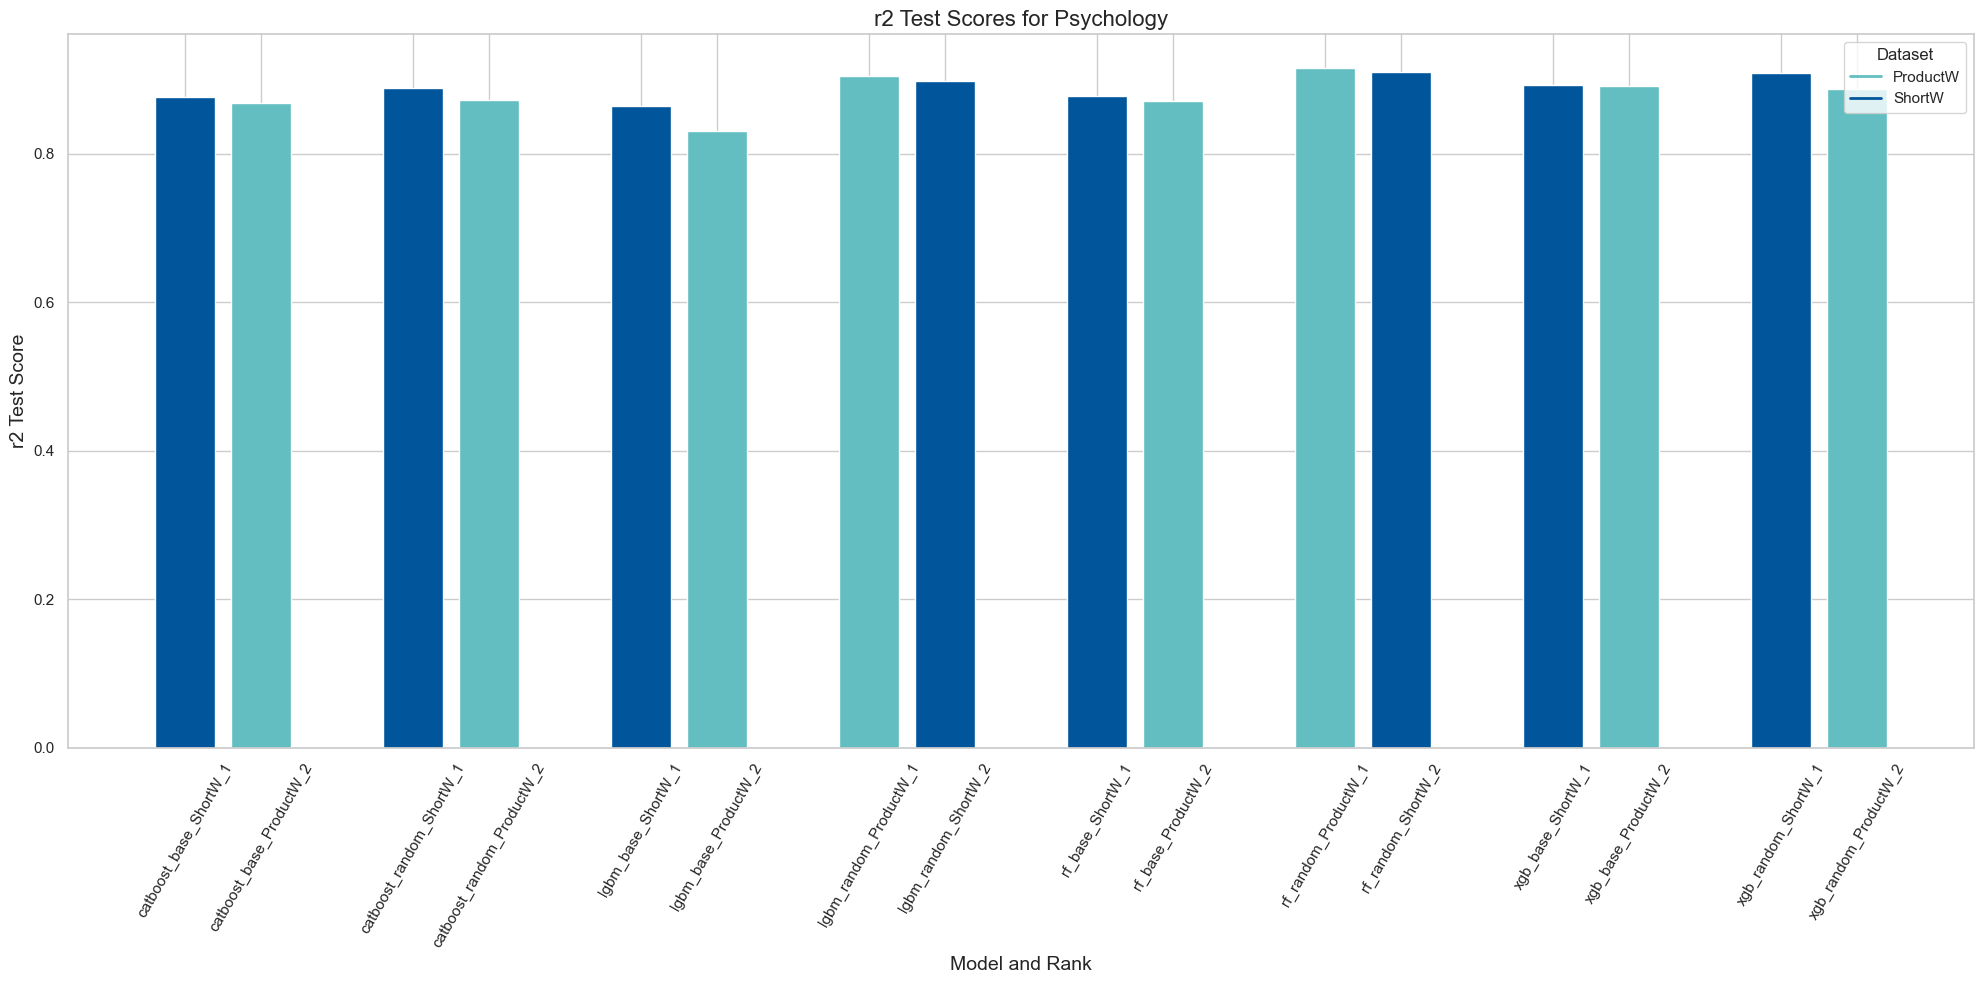

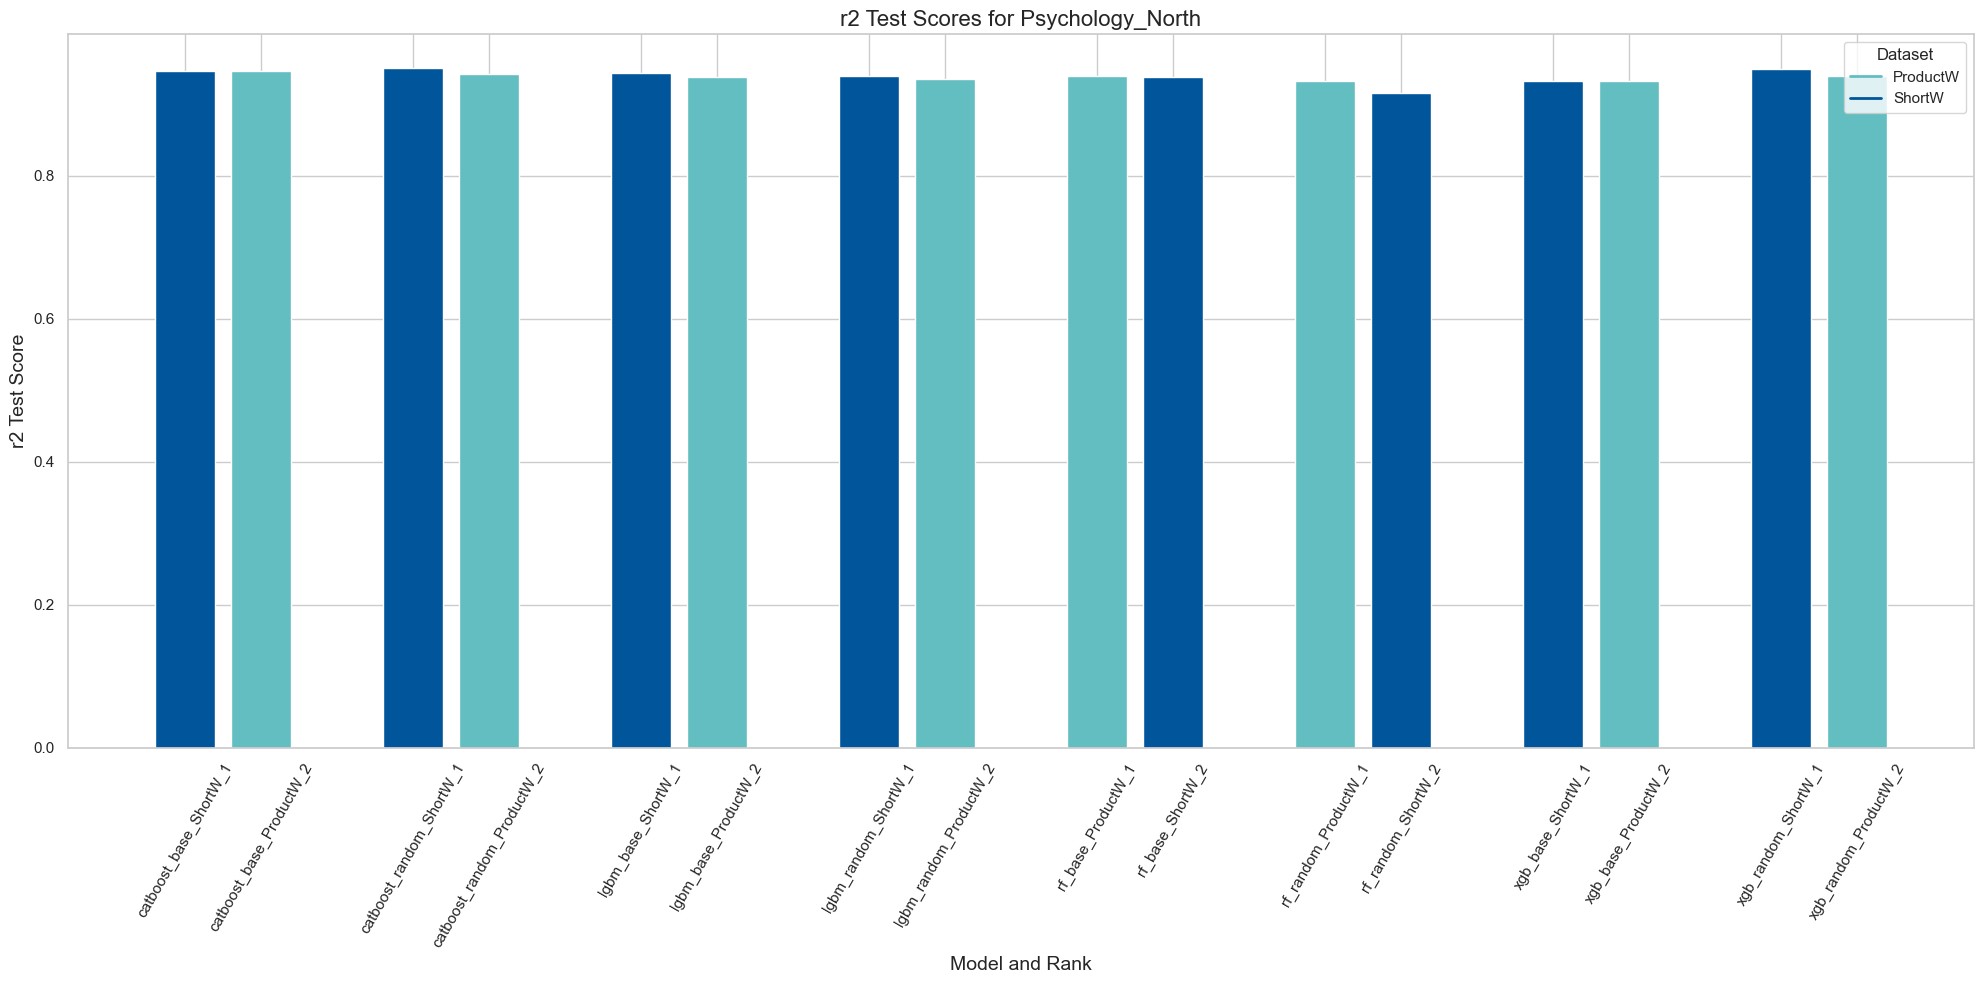

In [9]:
# Load the CSV files into DataFrames
df1 = pd.read_csv(f'{config.RESULT_DIR_PATH}/{FEATURE_TITLE}/scores/summary.csv')
df2 = pd.read_csv(f'{config.RESULT_DIR_PATH}/{FEATURE_TITLE2}/scores/summary.csv')

# Add a column to each DataFrame to indicate the Feature title
df1['feature_title'] = FEATURE_TITLE
df2['feature_title'] = FEATURE_TITLE2

# Combine the DataFrames into one
datasets = [df1, df2]
combined_df = pd.concat(datasets)
len_dataset = len(datasets)

# Define a color mapping for each dataset
title_colors = {
f'{FEATURE_TITLE}': '#62bec1',
f'{FEATURE_TITLE2}': '#00559b',

}
legend_handles = [plt.Line2D([0], [0], color=color, lw=2, label=title) for title, color in title_colors.items()]

# Calculate a rank or sort key that represents the order of rmse_test within each model for each building
ASCENDING = False
if METRIC != "r2":
    ASCENDING = True
combined_df[f'{METRIC}_rank'] = combined_df.groupby(['bldg', 'model'])[f'{METRIC}_test'].rank(method='first', ascending=ASCENDING)

# Create a new column 'model_feature_rank' combining 'model' and f'{METRIC}_rank'
combined_df['model_feature_rank'] = combined_df['model'] + '_' + combined_df['feature_title'] + '_' + combined_df[f'{METRIC}_rank'].astype(int).astype(str)

for bldg in combined_df['bldg'].unique():

    bldg_df = combined_df[combined_df['bldg'] == bldg].copy()
    bldg_df.sort_values(by=['model', f'{METRIC}_rank'], inplace=True)

    # Initialize plot
    plt.figure(figsize=(20, 10))

    # Unique models for ordering on x-axis
    unique_models = bldg_df['model_feature_rank'].unique()
    x_positions = np.arange(len(unique_models))

    # Adjust x_positions to introduce gaps
    gap_indices = [i for i, model in enumerate(unique_models) if model.endswith(f"_{len_dataset}")]
    for index in gap_indices:
        x_positions[index + 1:] += 1  # Increase gap size

    # Plot each bar manually
    for i, row in bldg_df.iterrows():
        x_pos = x_positions[np.where(unique_models == row['model_feature_rank'])[0][0]]
        # Use the color mapping for the dataset
        plt.bar(x_pos, row[f'{METRIC}_test'], label=row['feature_title'] if i == 0 else "", color=title_colors[row['feature_title']])

    # Adjust x-ticks
    plt.xticks(x_positions, unique_models, rotation=60)
    
    # Handling legends
    # Create unique labels and handles for the legend
    plt.legend(handles=legend_handles, title='Dataset', loc='upper right')

    # Set plot details
    plt.title(f'{METRIC} Test Scores for {bldg}', fontsize=16)
    plt.xlabel('Model and Rank', fontsize=14)
    plt.ylabel(f'{METRIC} Test Score', fontsize=14)
    plt.tight_layout()
    plt.show()